# Repurposing Foundational Train 数据集分析

这个notebook用于分析repurposing_foundational/train数据集。该数据集包含从竞争编程问题生成的描述性文本，用于训练视觉语言模型理解算法和数据结构相关图像。

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import BytesIO
from PIL import Image

# 设置数据集路径
DATASET_PATH = "/Users/jia/datasets/data/repurposing_foundational/train"

print("正在检查数据集...")
if not os.path.exists(DATASET_PATH):
    print(f"错误: 数据集路径 {DATASET_PATH} 不存在")
else:
    print(f"数据集路径: {DATASET_PATH}")

正在检查数据集...
数据集路径: /Users/jia/datasets/data/repurposing_foundational/train


In [2]:
# 列出所有数据文件
files = os.listdir(DATASET_PATH)
parquet_files = [f for f in files if f.endswith(".parquet")]

print(f"\n数据文件总数: {len(files)}")
print(f"Parquet文件数量: {len(parquet_files)}")
print(f"\n前10个文件:")
for file in parquet_files[:10]:
    print(f"  - {file}")


数据文件总数: 72
Parquet文件数量: 72

前10个文件:
  - train-00042-of-00072.parquet
  - train-00019-of-00072.parquet
  - train-00027-of-00072.parquet
  - train-00006-of-00072.parquet
  - train-00038-of-00072.parquet
  - train-00063-of-00072.parquet
  - train-00012-of-00072.parquet
  - train-00049-of-00072.parquet
  - train-00056-of-00072.parquet
  - train-00068-of-00072.parquet


In [3]:
# 加载第一个parquet文件
if parquet_files:
    first_file = os.path.join(DATASET_PATH, parquet_files[0])
    print(f"\n正在加载文件: {first_file}")
    try:
        df = pd.read_parquet(first_file)
        print(f"数据集形状: {df.shape}")
        print(f"列名: {list(df.columns)}")
    except Exception as e:
        print(f"加载文件时出错: {e}")
        print("请确保已安装pyarrow库: pip install pyarrow")


正在加载文件: /Users/jia/datasets/data/repurposing_foundational/train/train-00042-of-00072.parquet
数据集形状: (16765, 4)
列名: ['id', 'code', 'caption', 'image']


In [4]:
# 显示数据集基本信息
if 'df' in locals():
    print("\n数据集基本信息:")
    df.info()


数据集基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16765 entries, 0 to 16764
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       16765 non-null  object
 1   code     16765 non-null  object
 2   caption  16765 non-null  object
 3   image    16765 non-null  object
dtypes: object(4)
memory usage: 524.0+ KB


In [5]:
# 显示数据集前5行
if 'df' in locals():
    print("\n数据集前5行:")
    display(df.head())


数据集前5行:


,id,code,caption,image
0,819874_2,x0 x1 x2 x3 = isquare; x4 = on_dia x0 x3; x5 x...,Let $ABCD$ be a square.\nConstruct point $E$ o...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
1,129528_3,x0 x1 = segment; x2 x3 = square x0 x1; x4 = in...,Let $AB$ be a line segment.\nConstruct points ...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
2,51268_2,x0 x1 x2 x3 x4 = pentagon; x5 = nsquare x1 x3;...,Let $ABCDE$ be a pentagon.\nConstruct point $F...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
3,51268_3,x0 x1 x2 x3 x4 = pentagon; x5 = nsquare x1 x3;...,Let $ABCDE$ be a pentagon.\nConstruct point $F...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
4,167457_3,x0 x1 x2 = triangle12 x0 x1 x2 9 10; x3 x4 = t...,Let $ABC$ be a triangle where the ratio of sid...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...


In [6]:
# 检查数据集中的缺失值
if 'df' in locals():
    print("\n缺失值统计:")
    print(df.isnull().sum())


缺失值统计:
id         0
code       0
caption    0
image      0
dtype: int64


In [8]:
import matplotlib.pyplot as plt
# 设置字体，使用你在步骤1中找到的字体名称，例如'Heiti TC'或'PingFang SC'
plt.rcParams['font.sans-serif'] = ['Heiti TC']  # 也可以尝试 'PingFang SC'
# 解决负号可能显示为方块的问题[citation:2][citation:6]
plt.rcParams['axes.unicode_minus'] = False


caption长度统计:
count    16765.000000
mean       250.263227
std         56.005579
min         98.000000
25%        211.000000
50%        251.000000
75%        288.000000
max        484.000000
Name: caption_length, dtype: float64


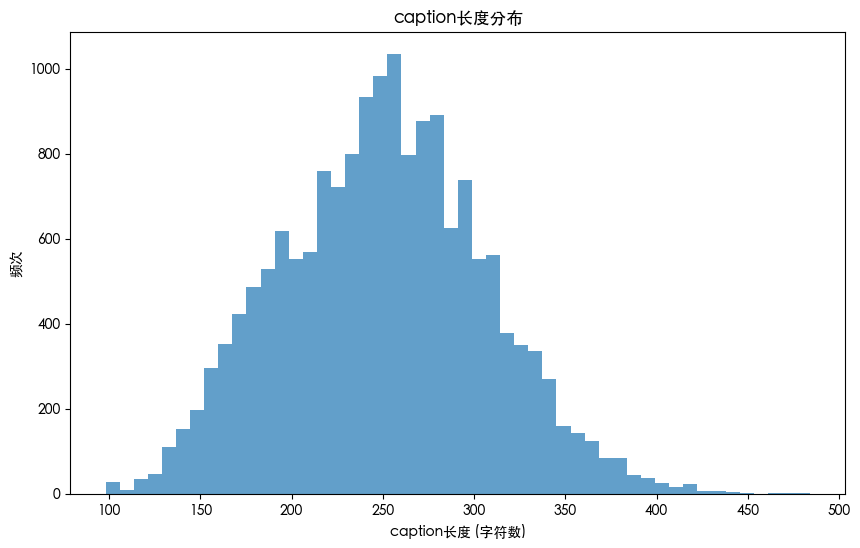

In [9]:
# 分析文本字段的长度（如果存在相关列）
if 'df' in locals():
    # 查找文本列
    text_columns = []
    for col in df.columns:
        if col in ['caption', 'text', 'description', 'content']:
            text_columns.append(col)
    
    # 分析每个文本列的长度
    for col in text_columns:
        if col in df.columns and df[col].dtype == 'object':
            df[f'{col}_length'] = df[col].str.len()
            
            print(f"\n{col}长度统计:")
            print(df[f'{col}_length'].describe())
            
            # 绘制长度分布直方图
            plt.figure(figsize=(10, 6))
            plt.hist(df[f'{col}_length'], bins=50, alpha=0.7)
            plt.title(f'{col}长度分布')
            plt.xlabel(f'{col}长度 (字符数)')
            plt.ylabel('频次')
            plt.show()
            
    # 如果没有找到标准文本列，尝试分析所有object类型的列
    if not text_columns:
        print("\n未找到标准文本列，尝试分析所有文本类型的列:")
        for col in df.columns:
            if df[col].dtype == 'object' and df[col].notnull().sum() > 0:
                # 尝试检查是否为文本数据
                sample = df[col].dropna().iloc[0]
                if isinstance(sample, str):
                    df[f'{col}_length'] = df[col].str.len()
                    print(f"\n{col}长度统计:")
                    print(df[f'{col}_length'].describe())
                    
                    # 绘制长度分布直方图
                    plt.figure(figsize=(10, 6))
                    plt.hist(df[f'{col}_length'], bins=50, alpha=0.7)
                    plt.title(f'{col}长度分布')
                    plt.xlabel(f'{col}长度 (字符数)')
                    plt.ylabel('频次')
                    plt.show()

In [10]:
# 显示一些样本数据
print("\n样本数据:")
if 'df' in locals():
    sample_size = min(5, len(df))
    sample_df = df.sample(n=sample_size, random_state=42)
    
    for i in range(len(sample_df)):
        print(f"\n样本 {i+1}:")
        row = sample_df.iloc[i]
        
        # 显示ID（如果存在）
        if 'id' in row:
            print(f"  ID: {row['id']}")
        
        # 显示文本内容
        text_columns = ['caption', 'text', 'description', 'content']
        for col in text_columns:
            if col in row:
                text = row[col]
                if isinstance(text, str):
                    print(f"  {col}: {text[:300]}{'...' if len(text) > 300 else ''}")
                break
        
        # 显示图像信息
        if 'image' in row:
            image = row['image']
            if image is not None and not (isinstance(image, (list, np.ndarray)) and len(image) == 0):
                print(f"  图像信息: 存在")
            else:
                print(f"  图像信息: 不存在")


样本数据:

样本 1:
  ID: 720250_2
  caption: Let $ABCDE$ be a pentagon.
Construct points $F$ and $G$ that divide segment $AC$ into three equal parts.
Construct $H$ as the excenter of triangle $CDG$ opposite to vertex $C$.
  图像信息: 存在

样本 2:
  ID: 562355_3
  caption: Let $ABCD$ be a rectangle.
Construct point $E$ such that the line $EA$ is parallel to the line $CD$.
Construct points $F$ and $G$ on side $BD$ such that lines $CF$ and $CG$ trisect the angle $BCD$.
Construct point $H$ such that line $DF$ is the angle bisector of $\angle CDH$.
  图像信息: 存在

样本 3:
  ID: 417572_3
  caption: Let $ABCD$ be a rectangle.
Construct point $E$ on line $AC$ such that $BE = BC$.
Construct points $F$ and $G$ on side $AD$ such that lines $BF$ and $BG$ trisect the angle $ABD$.
Construct points $H$ and $I$ such that $DGHI$ is a square.
  图像信息: 存在

样本 4:
  ID: 355325_3
  caption: Let $ABC$ be an equilateral triangle.
Construct point $D$ on the line passing through $A$ and $B$.
Construct points $E$ and $F$ on side $

In [11]:
# 显示样本数据中的详细信息
print("\n详细样本数据展示:")
if 'df' in locals():
    sample_size = min(3, len(df))
    sample_df = df.sample(n=sample_size, random_state=42)
    
    for i in range(len(sample_df)):
        print(f"\n{'='*60}")
        print(f"样本 {i+1}")
        print(f"{'='*60}")
        row = sample_df.iloc[i]
        
        # 显示所有字段
        for col in df.columns:
            if col != 'image':  # 单独处理图像
                value = row[col]
                print(f"{col}: {str(value)[:500]}{'...' if len(str(value)) > 500 else ''}")
                if len(str(value)) > 500:
                    print(f"(总长度: {len(str(value))} 字符)")
        
        # 显示图像信息
        if 'image' in row:
            image = row['image']
            print(f"\nImage (图像信息):")
            print("-" * 15)
            if image is not None and not (isinstance(image, (list, np.ndarray)) and len(image) == 0):
                if isinstance(image, dict):
                    print(f"图像数据类型: 字典")
                    print(f"键值: {list(image.keys())}")
                    for key, value in image.items():
                        if isinstance(value, (list, np.ndarray)):
                            print(f"  {key}: 数组, 形状 {np.array(value).shape}")
                        else:
                            print(f"  {key}: {type(value).__name__}, 值: {str(value)[:100]}{'...' if len(str(value)) > 100 else ''}")
                elif isinstance(image, (list, np.ndarray)):
                    arr = np.array(image)
                    print(f"图像数据类型: 数组")
                    print(f"形状: {arr.shape}")
                    print(f"数据类型: {arr.dtype}")
                    if arr.size > 0:
                        print(f"数值范围: {arr.min()} 到 {arr.max()}")
                else:
                    print(f"图像数据类型: {type(image).__name__}")
                    print(f"值: {str(image)[:200]}{'...' if len(str(image)) > 200 else ''}")
            else:
                print("图像数据不存在或为空")


详细样本数据展示:

样本 1
id: 720250_2
code: x0 x1 x2 x3 x4 = pentagon; x5 x6 = trisegment x0 x2; x7 = excenter x2 x3 x6
caption: Let $ABCDE$ be a pentagon.
Construct points $F$ and $G$ that divide segment $AC$ into three equal parts.
Construct $H$ as the excenter of triangle $CDG$ opposite to vertex $C$.
caption_length: 176

Image (图像信息):
---------------
图像数据类型: 字典
键值: ['bytes', 'path']
  bytes: bytes, 值: b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x06\x00\x00\x00\xf4x\xd4\x...
  path: NoneType, 值: None

样本 2
id: 562355_3
code: x0 x1 x2 x3 = rectangle; x4 = on_pline x0 x2 x3; x5 x6 = trisect x1 x2 x3; x7 = angle_mirror x2 x3 x5
caption: Let $ABCD$ be a rectangle.
Construct point $E$ such that the line $EA$ is parallel to the line $CD$.
Construct points $F$ and $G$ on side $BD$ such that lines $CF$ and $CG$ trisect the angle $BCD$.
Construct point $H$ such that line $DF$ is the angle bisector of $\angle CDH$.
caption_length: 276

Image (图像信息):
---------------
图像数据类


尝试显示图像样本:


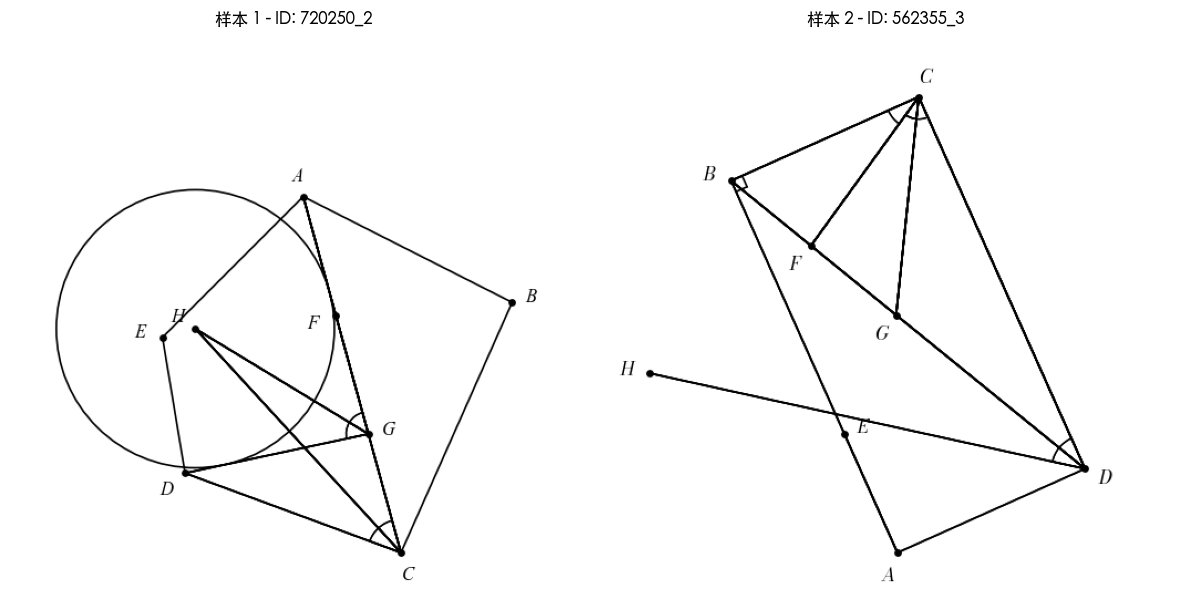

In [12]:
# 尝试显示图像样本
print("\n尝试显示图像样本:")
if 'df' in locals() and 'image' in df.columns:
    # 筛选出有图像的样本
    image_samples = df[df['image'].notnull()]
    
    if len(image_samples) > 0:
        sample_df = image_samples.sample(n=min(2, len(image_samples)), random_state=42)
        
        fig, axes = plt.subplots(1, min(2, len(sample_df)), figsize=(12, 6))
        if min(2, len(sample_df)) == 1:
            axes = [axes]
        
        for i in range(len(sample_df)):
            row = sample_df.iloc[i]
            if 'image' in row and row['image'] is not None:
                try:
                    # 从字节数据创建图像
                    if isinstance(row['image'], dict) and 'bytes' in row['image']:
                        image_bytes = row['image']['bytes']
                        image_buffer = BytesIO(image_bytes)
                        img = Image.open(image_buffer)
                        
                        # 显示图像
                        axes[i].imshow(img)
                        axes[i].set_title(f'样本 {i+1} - ID: {row["id"]}')
                        axes[i].axis('off')
                    else:
                        axes[i].text(0.5, 0.5, f'无法解析\n图像数据', 
                                    ha='center', va='center', transform=axes[i].transAxes)
                        axes[i].axis('off')
                except Exception as e:
                    axes[i].text(0.5, 0.5, f'无法显示\n图像\n错误: {str(e)[:30]}', 
                                ha='center', va='center', transform=axes[i].transAxes)
                    axes[i].axis('off')
            else:
                axes[i].text(0.5, 0.5, f'无图像数据\n样本 {i+1}', 
                            ha='center', va='center', transform=axes[i].transAxes)
                axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("数据集中没有可用的图像数据")

In [11]:
# 添加数据统计信息
print("\n数据统计信息:")
print("="*50)
if 'df' in locals():
    print(f"总样本数: {len(df)}")
    
    # 文本长度统计
    text_columns = ['caption', 'text', 'description', 'content']
    for col in text_columns:
        if col in df.columns and df[col].dtype == 'object':
            df[f'{col}_length'] = df[col].str.len()
            print(f"\n{col}长度统计:")
            print(f"  平均长度: {df[f'{col}_length'].mean():.2f} 字符")
            print(f"  最小长度: {df[f'{col}_length'].min()} 字符")
            print(f"  最大长度: {df[f'{col}_length'].max()} 字符")
            print(f"  长度中位数: {df[f'{col}_length'].median()} 字符")
    
    # 图像数据统计
    if 'image' in df.columns:
        # 统计有图像数据的样本数
        has_image = df['image'].apply(lambda x: x is not None and not (isinstance(x, (list, np.ndarray)) and len(x) == 0))
        count_with_image = has_image.sum()
        print(f"\n图像数据统计:")
        print(f"  有图像数据的样本数: {count_with_image}")
        print(f"  无图像数据的样本数: {len(df) - count_with_image}")
        print(f"  图像数据覆盖率: {count_with_image/len(df)*100:.2f}%")
    
    # 显示各列的数据类型
    print(f"\n各列数据类型:")
    for col in df.columns:
        print(f"  {col}: {df[col].dtype}")

print("="*50)
print("分析完成")


数据统计信息:
总样本数: 16765

caption长度统计:
  平均长度: 250.26 字符
  最小长度: 98 字符
  最大长度: 484 字符
  长度中位数: 251.0 字符

图像数据统计:
  有图像数据的样本数: 16765
  无图像数据的样本数: 0
  图像数据覆盖率: 100.00%

各列数据类型:
  id: object
  code: object
  caption: object
  image: object
  caption_length: int64
分析完成
